In [89]:
import jax.numpy as jnp
import jax
import jax.random as jr
import numpy as np

rng = jr.key(126)

# Number of drones to generate signal schedules for
N_DRONES = 15
# Number of simulated timesteps.
N_TIMESTEPS = 100
# Maximum number of colors used per drone
N_COLOR_SWITCHES = 20

# "Resolution" of colors: there are 2^24 RGB colors, and this selects 2^24/(n^3) possibilities out of those.
# Used to make sure colors that are intended to be different can be easily read as such.
COLOR_BLOCK_SIZE = 5

color_universe = map(tuple, jr.randint(rng, (2 * N_DRONES * N_COLOR_SWITCHES,3), minval=0, maxval=255 // COLOR_BLOCK_SIZE).tolist())

unique_colors = set(color_universe)
colors = jnp.array(list(unique_colors))[:N_DRONES * N_COLOR_SWITCHES].reshape(N_DRONES, N_COLOR_SWITCHES, 3)

color_switches = jr.randint(rng, (N_DRONES,N_COLOR_SWITCHES), minval=0, maxval=N_TIMESTEPS)
color_switches = jnp.sort(color_switches, axis=1)
schedule_lengths = jnp.diff(color_switches, axis=1, prepend=0)


schedules = []
for color_list, schedule in zip(colors, schedule_lengths):
    schedules.append(jnp.repeat(color_list, schedule, axis=0, total_repeat_length=N_TIMESTEPS))

schedules = jnp.array(schedules)

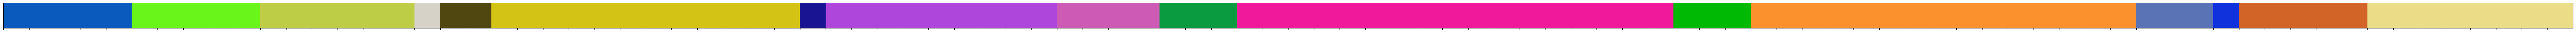

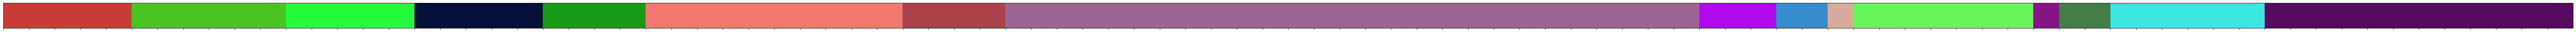

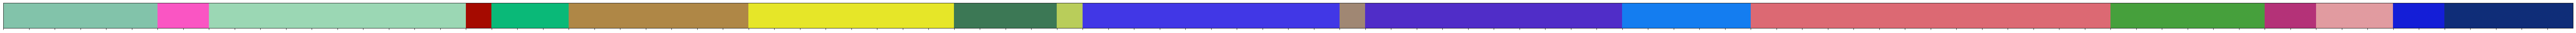

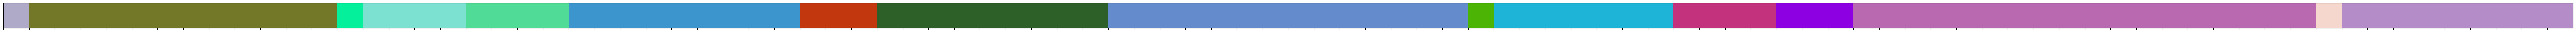

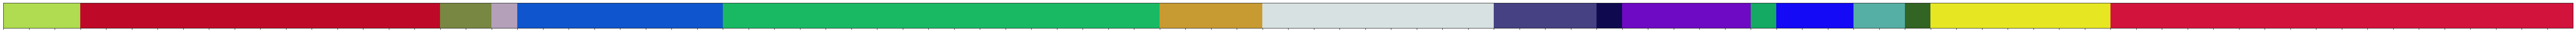

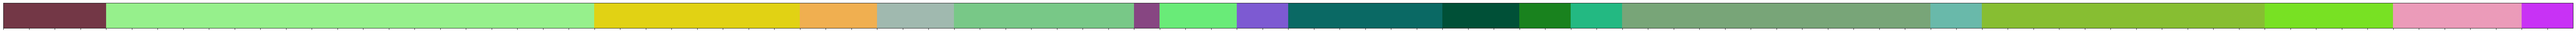

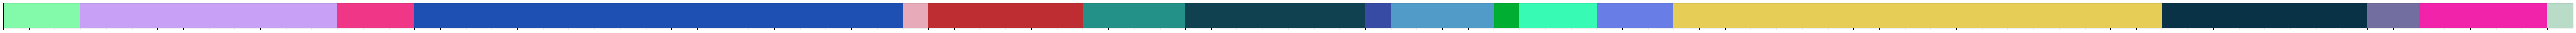

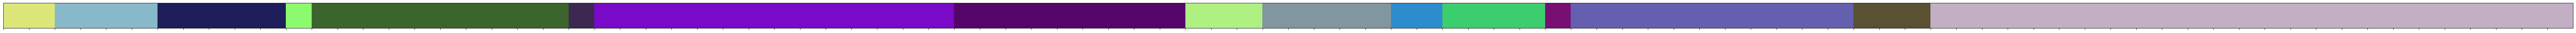

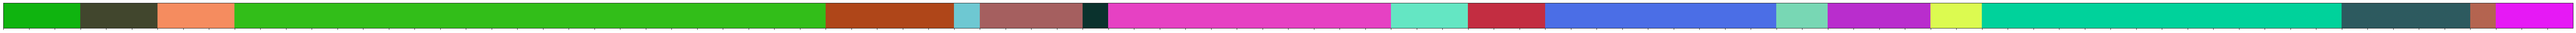

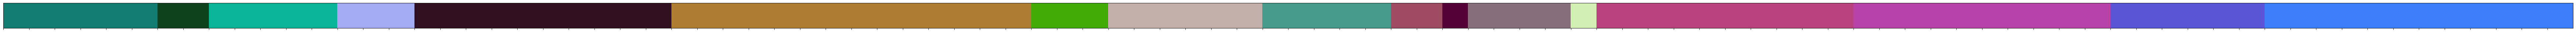

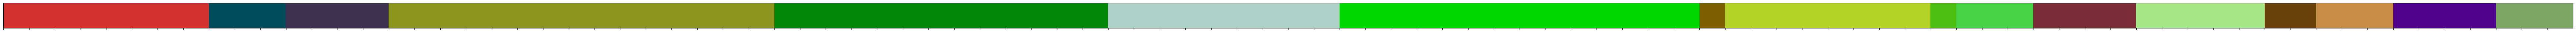

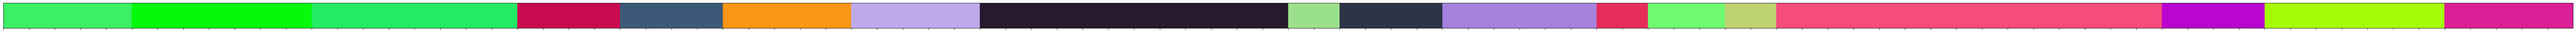

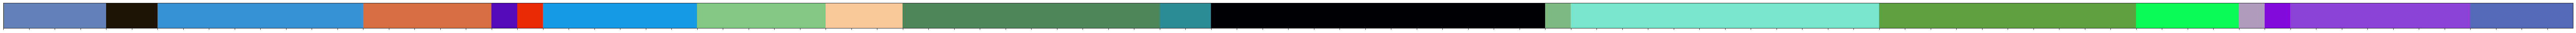

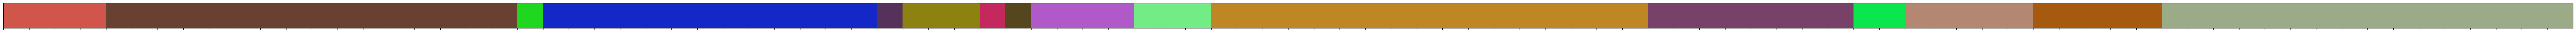

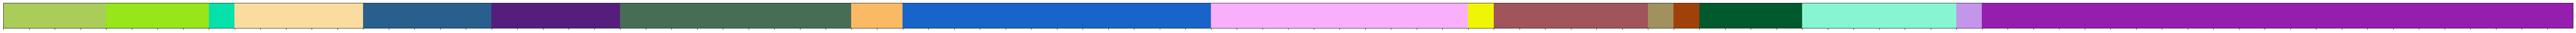

In [90]:
from matplotlib import colors as mpc
import seaborn as sns

for sched in schedules:
    hexes = np.array([mpc.rgb2hex(((c * COLOR_BLOCK_SIZE) / 255).tolist()) for c in (sched.reshape(-1, 3))])
    sns.palplot(hexes)

In [106]:
np.repeat(np.array(colors * COLOR_BLOCK_SIZE), n_repeats, axis=0).shape

(300, 20, 3)

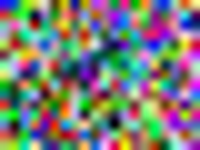

In [113]:
from PIL import Image



color_hexes = np.array(colors * COLOR_BLOCK_SIZE).astype(np.int8)

im = Image.fromarray(color_hexes, mode='RGB')
n_upscale = 10
im.resize((im.width * n_upscale, im.height * n_upscale))

In [83]:
import plotly.express as px

xx, yy, zz = schedules.reshape(-1, 3).T
drone_i = jnp.repeat(jnp.arange(N_DRONES), N_TIMESTEPS)

px.scatter_3d(
    x=xx,
    y=yy,
    z=zz,
    color=list(map(str, drone_i.tolist()))
)

/home/nicholas/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

